# Supervised Learning Regression

Problem Description :   
A Chinese automobile company aspires to enter the US market by setting up their manufacturing   
unit there and producing cars locally to give competition to their US and European counterparts.  
They have contracted an automobile consulting company to understand the factors on which   
the pricing of cars depends. Specifically, they want to understand the factors affecting the    
pricing of cars in the American market, since those may be very different from the Chinese market.  
   
Essentially, the company wants to know:    
• Which variables are significant in predicting the price of a car    
• How well those variables describe the price of a car    
    
Based on various market surveys, the consulting firm has gathered a large dataset of different   
types of cars across the American market.   

Business Goal:    

You are required to model the price of cars with the available independent variables. It will be   
used by the management to understand how exactly the prices vary with the independent   
variables. They can accordingly manipulate the design of the cars, the business strategy etc. to   
meet certain price levels. Further, the model will be a good way for the management to   
understand the pricing dynamics of a new market  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [6]:
df.price.describe().round(2)

count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

In [7]:
# No. of Duplicate Rows
len(df[df.duplicated()])

0

In [8]:
#  No. of Unique values in each column
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

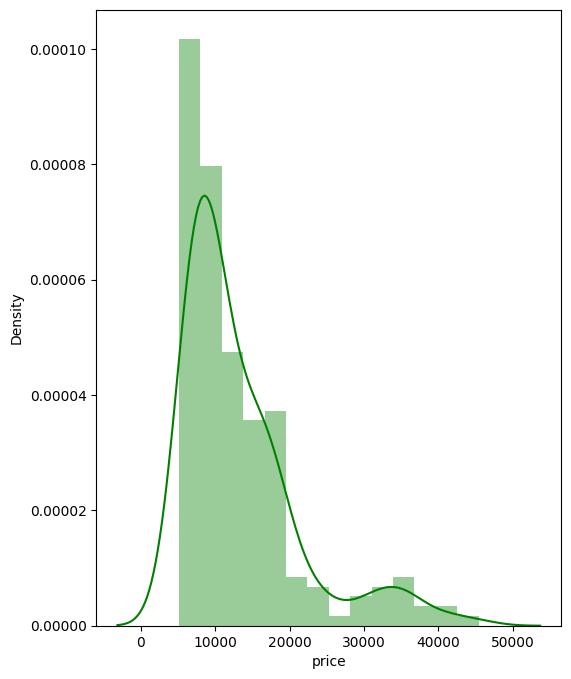

In [9]:
plt.figure(figsize=(6, 8))
sns.distplot(df.price, color ='g')
plt.show()

In [10]:
# IQR method to find outliers

q1, q2, q3 = df.price.quantile([0.25, 0.50, 0.75])
print("q1 = {}, q2 = {}, q3 = {}".format(q1, q2, q3))
IQR = q3 - q1
print("IQR = ", IQR)
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print("Lower_Whisker = {} ,Upper_Whisker = {} ". format(lower, upper))
outliers = df[(df.price<lower) | (df.price>upper)].price.count()
print("Total No. outliers in Age = ", outliers)

q1 = 7788.0, q2 = 10295.0, q3 = 16503.0
IQR =  8715.0
Lower_Whisker = -5284.5 ,Upper_Whisker = 29575.5 
Total No. outliers in Age =  15


In [11]:
# remove outliers
df1 = df[(df['price']>lower) & (df['price']<upper)]
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
df1['price'].describe().round(2)

count      190.00
mean     11509.40
std       4968.44
min       5118.00
25%       7701.25
50%       9959.50
75%      15197.50
max      28248.00
Name: price, dtype: float64

In [13]:
# Unique values in each column

for i in df1:
    print(i)
    print(df1[i].unique())
    print("Length of unique values in column ", i, ' :', len(df1[i].unique()))
    print(' ')

car_ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205]
Length of unique values in column  car_ID  : 190
 
symboling
[ 3  1  2  0 -1 -2]
Length of unique values in column  symboling  : 6
 
CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 10

### Data Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

#Label encoding
label_encoder = LabelEncoder()
for i in df1[["drivewheel", "boreratio", "fueltype","aspiration","doornumber","carbody", "drivewheel","fuelsystem","enginetype","cylindernumber", "drivewheel"]]:
    df1[i] = label_encoder.fit_transform(df1[i])
df1


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,front,88.6,...,130,5,23,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,front,88.6,...,130,5,23,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,front,94.5,...,152,5,1,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,front,99.8,...,109,5,13,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,front,99.4,...,136,5,13,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,0,3,2,front,109.1,...,141,5,33,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,0,3,2,front,109.1,...,141,5,33,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,0,3,2,front,109.1,...,173,5,26,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,0,3,2,front,109.1,...,145,3,6,3.40,23.0,106,4800,26,27,22470.0


### Feature Selection

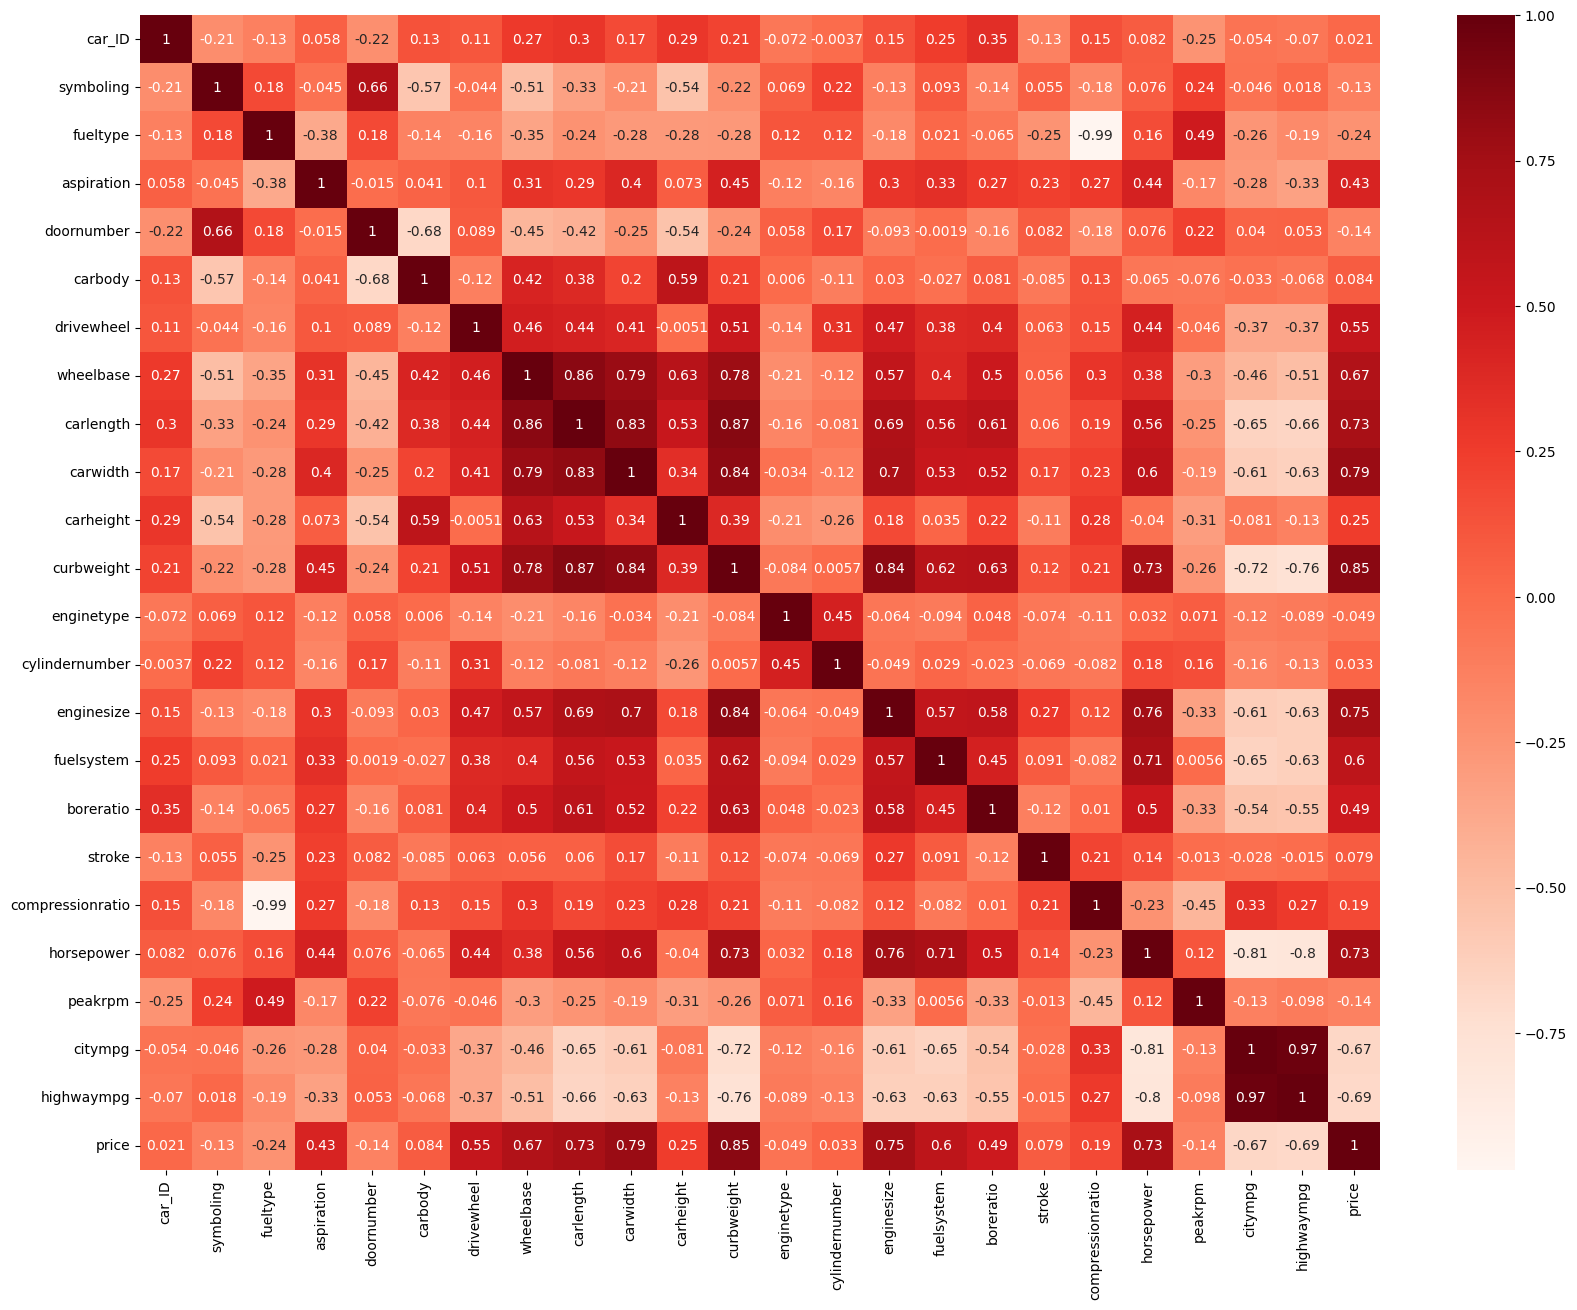

In [15]:
plt.figure(figsize=(20, 15))
corr = df1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(df1, 0.65)
# correlated columns
corr_features

{'carbody',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'doornumber',
 'enginesize',
 'highwaympg',
 'horsepower',
 'price'}

In [18]:
corr_features = list(corr_features)
df_corr = df1[corr_features ]
df_corr

,enginesize,curbweight,doornumber,carwidth,highwaympg,price,carbody,horsepower,citympg,carlength,compressionratio
0,130,2548,1,64.1,27,13495.0,0,111,21,168.8,9.0
1,130,2548,1,64.1,27,16500.0,0,111,21,168.8,9.0
2,152,2823,1,65.5,26,16500.0,2,154,19,171.2,9.0
3,109,2337,0,66.2,30,13950.0,3,102,24,176.6,10.0
4,136,2824,0,66.4,22,17450.0,3,115,18,176.6,8.0
...,...,...,...,...,...,...,...,...,...,...,...
200,141,2952,0,68.9,28,16845.0,3,114,23,188.8,9.5
201,141,3049,0,68.8,25,19045.0,3,160,19,188.8,8.7
202,173,3012,0,68.9,23,21485.0,3,134,18,188.8,8.8
203,145,3217,0,68.9,27,22470.0,3,106,26,188.8,23.0


### scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# StandardScaler()
# create Scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df_corr)

# Transform the data
scaled_data = scaler.transform(df_corr)

# Print the scaled data
print(scaled_data.round(3))

[[ 0.433  0.153  1.148 ... -0.798 -0.354 -0.296]
 [ 0.433  0.153  1.148 ... -0.798 -0.354 -0.296]
 [ 1.254  0.771  1.148 ... -1.121 -0.142 -0.296]
 ...
 [ 2.038  1.196 -0.871 ... -1.283  1.409 -0.345]
 [ 0.993  1.657 -0.871 ...  0.008  1.409  3.2  ]
 [ 0.843  1.309 -0.871 ... -1.121  1.409 -0.171]]


### Linear Regression

In [21]:
features = ['carbody', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'doornumber',
            'enginesize', 'highwaympg', 'horsepower']
X = df_corr[features]
Y = df_corr['price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.80)

In [22]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
reg.coef_

array([-287.25763082,  -72.9664639 ,  821.06676477, -184.38199809,
        177.66188216,    4.60196464, -495.6944035 ,   16.92789058,
         92.69775663,   39.67457508])

In [24]:
reg.intercept_

-46028.28132684086

In [25]:
reg.score(x_test,y_test)

0.686904612558001

In [26]:
reg.predict(x_test)

array([ 9401.85799666, 16099.18423735, 18583.0162524 ,  9391.66854526,
       10212.0929313 , 11623.74439261, 16027.46601991, 12946.38078932,
       13478.27286513, 23136.09424527, 16501.46837825,  6802.78529243,
       11349.60928177, 10602.85266642,  7122.82582219,  9786.8300548 ,
        5454.46634873,  9471.15987175,  7260.01051638,  -164.21374077,
       20154.22346991, 12623.23096306, 10707.60836806, 10282.52445829,
        9530.86848623, 17491.9182878 ,  7724.665075  ,  9456.92269298,
       11745.79750026,  6266.66901803, 12349.74871656, 15136.94032979,
        5513.6401431 , 17830.91471202, 13575.81071187,  6898.09352662,
       11326.59945855,  6030.88489928])

In [27]:
mse=mean_squared_error(y_test,reg.predict(x_test))
mse

6008530.842558198

In [28]:
np.sqrt(mse)

2451.2304752018317

In [29]:
pred=reg.predict(x_test)
print(f"Prediction :\n{pred}")

Prediction :
[ 9401.85799666 16099.18423735 18583.0162524   9391.66854526
 10212.0929313  11623.74439261 16027.46601991 12946.38078932
 13478.27286513 23136.09424527 16501.46837825  6802.78529243
 11349.60928177 10602.85266642  7122.82582219  9786.8300548
  5454.46634873  9471.15987175  7260.01051638  -164.21374077
 20154.22346991 12623.23096306 10707.60836806 10282.52445829
  9530.86848623 17491.9182878   7724.665075    9456.92269298
 11745.79750026  6266.66901803 12349.74871656 15136.94032979
  5513.6401431  17830.91471202 13575.81071187  6898.09352662
 11326.59945855  6030.88489928]


In [30]:
x_test

,carbody,carlength,carwidth,citympg,compressionratio,curbweight,doornumber,enginesize,highwaympg,horsepower
39,3,175.4,65.2,27,9.0,2304,0,110,33,86
137,3,186.6,66.5,19,9.0,2847,0,121,26,160
112,3,186.7,68.4,28,21.0,3252,0,152,33,95
166,2,168.7,64.0,26,9.4,2300,1,98,29,112
28,4,174.6,64.6,24,8.5,2535,0,122,30,88
87,3,172.4,65.4,23,7.5,2403,0,110,30,116
124,2,173.2,66.3,19,7.0,2818,1,156,24,145
168,1,176.2,65.6,24,9.3,2536,1,146,30,116
171,2,176.2,65.6,24,9.3,2714,1,146,30,116
67,3,190.9,70.3,22,21.5,3515,0,183,25,123


In [31]:
y_test

39      8845.0
137    18620.0
112    16900.0
166     9538.0
28      8921.0
87      9279.0
124    12764.0
168     9639.0
171    11549.0
67     25552.0
83     14869.0
154     7898.0
57     13645.0
61     10595.0
164     8238.0
10     16430.0
150     5348.0
158     7898.0
33      6529.0
18      5151.0
104    17199.0
192    13845.0
188     9995.0
11     16925.0
185     8195.0
181    15750.0
162     9258.0
37      7895.0
177    11248.0
96      7499.0
0      13495.0
195    13415.0
20      6575.0
103    13499.0
135    15510.0
43      6785.0
55     10945.0
76      5389.0
Name: price, dtype: float64

In [32]:
reg.coef_

array([-287.25763082,  -72.9664639 ,  821.06676477, -184.38199809,
        177.66188216,    4.60196464, -495.6944035 ,   16.92789058,
         92.69775663,   39.67457508])

In [33]:
reg.intercept_

-46028.28132684086

In [34]:
linear_equ=reg.intercept_
for i in range(0,10):
    linear_equ+=reg.coef_[i]*x_test.iloc[27][i]
linear_equ

9456.922692978402

In [35]:
print("Independent values X :\n",x_test.iloc[27])
print("Dependent value Y :",y_test.iloc[27])
print(" Predicted value by the model :",reg.predict([x_test.iloc[27]]))

Independent values X :
 carbody                2.0
carlength            167.5
carwidth              65.2
citympg               27.0
compressionratio       9.0
curbweight          2236.0
doornumber             1.0
enginesize           110.0
highwaympg            33.0
horsepower            86.0
Name: 37, dtype: float64
Dependent value Y : 7895.0
 Predicted value by the model : [9456.92269298]
